# Logistic regression 逻辑斯蒂回归

In [1]:
import numpy as np

## Model：
$$
P(y|x)=\frac {1} {1+e^{-(w^T x + b)}}
$$

## Strategy: Maximum likelihood estimation
Sigmoid 函数：

$$
S(x)=\frac {1} {1+e^{-x}}\\
S'(x)=S(x)[1-S(x)]
$$

另 $z= y(w^T x +b)$ ,则

$$
P(y|x)=S(z)
$$

最大似然函数

$$
L(w,b)=P(Y|X;{w,b})
=\prod_{n=1}^N {P(y_n|x_n;w,b)}
=\prod_{n=1}^N S(z_n)
$$

对似然函数两边取对数得

$$
lnL(w,b)=\sum_{i=1}^N {ln[S(z_n)]}\\
\nabla_w lnL(w,b)=\sum_{i=1}^N {S(-z_n) y_n x_n}\\
\nabla_b lnL(w,b)=\sum_{i=1}^N {S(-z_n) y_n}
$$

即优化问题

$$
\min_{w,b} \quad -\sum_{i=1}^N {ln[S(z_n)]}
$$

## Algorithm: Gradient Descent

$$
x^{i+1}=x^i-\eta \times \nabla_x f(x)|_{x=x^i}
$$

$$
when\ \ i\to\infty\quad x=arg \min_x f(x)
$$

In [2]:
def minimize_GD(fun, dfun, x0, tol=1e-5, eta=0.05, gamma=0.1,maxIter=100000):
    # fun：目标函数 fun(array x):return valve
    # dfun: 目标函数梯度函数 g(array x):return array 形似 x
    # x0：起始点
    # tol：误差范围
    # eta: 初始学习率
    # gammma: 学习率衰减 每1000次
    # maxIter：最大迭代次数
    cnt = 0
    lrd_cnt = 0
    x = x0
    e = eta
    g = dfun(x)
    while np.linalg.norm(g) > tol and cnt < maxIter:
        # 以梯度范数效于误差，作为结束条件
        x = x-eta*g
        g = dfun(x)
        cnt += 1
        lrd_cnt += 1
        if lrd_cnt >= 1000:
            lrd_cnt = 0
            e=e*gamma
    return {'目标函数最小值': fun(x),
            '参数': x,
            '迭代次数': cnt,
            '成功与否': np.linalg.norm(g) <= tol}

In [3]:
# 测试 minimization_GD
fun = lambda x: (x[0]-2)**2+(x[1]-3)**2+(x[2]+1)**2
dfun = lambda x: np.array([2*x[0]-4,2*x[1]-6,2*x[2]+2])
x0=np.array([1,3,-1])
minimize_GD(fun,dfun,x0)

{'目标函数最小值': 2.4224910985703708e-11,
 '参数': array([ 1.99999508,  3.        , -1.        ]),
 '迭代次数': 116,
 '成功与否': True}

为了方便运算将 b 并入 w 中，即在 x 后添加一个 1

$$
lnL(w)=\sum_{i=1}^N {ln[S(z_n)]}\\
\nabla_w lnL(w)=\sum_{i=1}^N {S(-z_n) y_n x_n}
$$

目标函数为

$$
-\frac 1 N lnL(w)=-\frac 1 N \sum_{i=1}^N {ln[S(z_n)]}
$$

目标函数梯度函数为

$$
-\frac 1 N \nabla_w lnL(w)=-\frac 1 N \sum_{i=1}^N {S(-z_n) y_n x_n}
$$

In [3]:
def S(x): return 1/(1+np.exp(-x)) # 定义Sigmoid函数

In [4]:
# 读入数据 
from sklearn.datasets import load_iris
from random import shuffle
iris = load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
Y = Y*2-1  # 原数据的标签是0，1，这里处理成 -1，1
order = [i for i in range(0, 100)]
shuffle(order)
X, Y = X[order], Y[order]  # 乱序
N = 50
x, y = X[:N], Y[:N]  # 前N个作为训练集

In [7]:
# 批量梯度下降法 BGD
x_1 = np.concatenate((x, np.ones((N, 1))), axis=1)  # X 后面添加一排 1
fun = lambda w : -1/N*(np.log(S(y*np.dot(w, x_1.T)))).sum()
dfun = lambda w : -1/N*np.dot(S(-y*np.dot(w, x_1.T))*y, x_1)
w0 = np.ones(5)
res = minimize_GD(fun,dfun,w0,eta=0.1,gamma=0.5,tol=2e-5,maxIter=np.infty)
# res['参数'] = res['参数']/np.linalg.norm(res['参数'])
wb = res['参数']
res

{'目标函数最小值': 2.2178545759859353e-05,
 '参数': array([-1.9426866 , -4.52039231,  7.82967764,  4.19480088, -0.31481874]),
 '迭代次数': 534907,
 '成功与否': True}

合适的学习率固定衰减能显著减少简单问题的迭代次数

<br/>

|初始学习率|学习率衰减值|误差|迭代次数|最小值|评价|
|------:|------:|------:|-------:|------:|------|
|0.1|0.5|2e-5|   502273|2.10008e-05|与下组对照|
|0.01|1.0|2e-5| 5022779|2.10009e-05|无学习率衰减情况下，迭代次数过大|

In [6]:
res

{'目标函数最小值': 2.2178545759859353e-05,
 '参数': array([-0.19122627, -0.44495996,  0.7707059 ,  0.41291071, -0.03098884]),
 '迭代次数': 534907,
 '成功与否': True}

In [8]:
# 用 scipy.optimize.minimize 来作为对照 ;
from scipy.optimize import minimize
w0=np.ones(5)
res=minimize(fun,w0)
print('最小值：',res.fun)
print('参数：',res.x)
print('成功与否：',res.success)

最小值： 2.1580919828592794e-06
参数： [-2.10488154 -6.56942085  9.90047514  5.12260486 -0.48935849]
成功与否： True


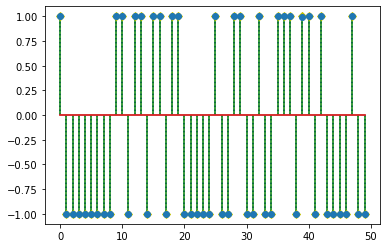

In [10]:
# 测试一下
def decifun(x): return 2*S(np.inner(x,wb[:-1])+wb[-1])-1
clfRes=decifun(X[N:])
import matplotlib.pyplot as plt
plt.stem(Y[N:], use_line_collection=True, linefmt='b:', markerfmt='yD')
plt.stem(clfRes, use_line_collection=True, linefmt='g-')
plt.show()

## Sklearn

<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(x,y)
wb=np.concatenate((clf.coef_,clf.intercept_.reshape((1,1))),axis=1)
wb=wb/np.linalg.norm(wb)
print('参数为',wb) # 差的比较多
print('预测准确率：',clf.score(X[N:],Y[N:]))

参数为 [[-0.16467573 -0.48693876  0.78404089  0.33683552 -0.08714506]]
预测准确率： 1.0
